In [1]:
#dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cases_df = pd.read_csv("Resources/statewide_cases.csv")

In [3]:
LA_cases = cases_df.loc[(cases_df["county"] == "Los Angeles")]
OC_cases = cases_df.loc[(cases_df["county"] == "Orange")]

LA_metro = pd.merge(LA_cases, OC_cases, how="outer", on="date")
LA_metro["newcounts"] = LA_metro["newcountconfirmed_x"] + LA_metro["newcountconfirmed_y"]
LA_y = LA_metro["newcounts"].tolist()

date_axis = LA_cases["date"].tolist()

In [4]:
SF_cases = cases_df.loc[(cases_df["county"] == "San Francisco")]
MA_cases = cases_df.loc[(cases_df["county"] == "Marin")]
merge1 = pd.merge(SF_cases, MA_cases, how="outer", on="date")
#merge1= merge1.rename(columns={"newcountconfirmed_x": "SFcount", })

AL_cases = cases_df.loc[(cases_df["county"] == "Alameda")]
merge2 = pd.merge(merge1, AL_cases, how="outer", on="date")
merge2 = merge2[["newcountconfirmed_x", "date", "newcountconfirmed_y", "newcountconfirmed"]]
merge2 = merge2.rename(columns={"newcountconfirmed_x":  "SFcount", "newcountconfirmed_y": "MAcount", "newcountconfirmed": "ALcount"})

CC_cases = cases_df.loc[(cases_df["county"] == "Contra Costa")]
merge3 = pd.merge(merge2, CC_cases, how="outer", on="date")

SM_cases = cases_df.loc[(cases_df["county"] == "San Mateo")]
SF_metro = pd.merge(merge3, SM_cases, how="outer", on="date")
SF_metro = SF_metro[["SFcount", "date", "MAcount", "ALcount", "newcountconfirmed_x", "newcountconfirmed_y"]]

SF_metro["newcounts"] = SF_metro["SFcount"] + SF_metro["MAcount"] + SF_metro["ALcount"] + SF_metro["newcountconfirmed_x"] + SF_metro["newcountconfirmed_y"]
SF_y = SF_metro["newcounts"].tolist()

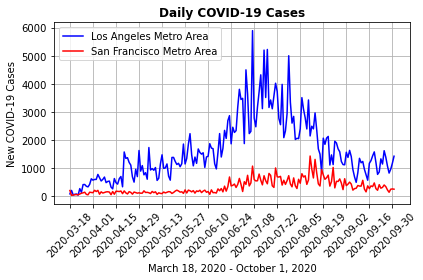

In [5]:
#make a chart of daily confirmed cases over time
LA_line, = plt.plot(date_axis, LA_y, color="blue", label="Los Angeles Metro Area")
SF_line, = plt.plot(date_axis, SF_y, color="red", label="San Francisco Metro Area")
plt.title("Daily COVID-19 Cases", fontweight="bold")
plt.xlabel("March 18, 2020 - October 1, 2020")
plt.ylabel("New COVID-19 Cases")
plt.legend(handles=[LA_line, SF_line], loc="best")

#reduce the number of ticks on the x axis with 'slice notation'
plt.xticks(date_axis[::14], rotation="45")
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/NEW_DailyCases.png", transparent=True, dpi=300)
plt.show()

In [6]:
#read in census info you made; grab county population size
LASF_census = pd.read_csv("Resources/NEW_LASF_Census2018.csv")
LA_pop = LASF_census.iloc[0,1] + LASF_census.iloc[1,1]
SF_pop = LASF_census.iloc[2,1] + LASF_census.iloc[3,1] + LASF_census.iloc[4,1] + LASF_census.iloc[5,1] + LASF_census.iloc[6,1]

#use daily cases and population size to create a new column of daily cases per 100,000 individuals
LA_metro["percapita"] = (LA_metro["newcounts"]/LA_pop) * 100000
SF_metro["percapita"] = (SF_metro["newcounts"]/SF_pop) * 100000

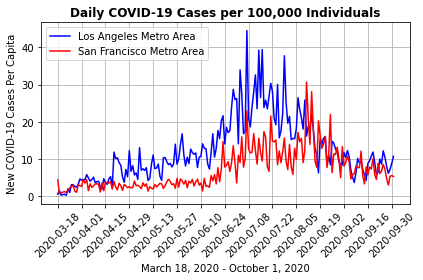

In [7]:
#make a list of dates for the x-axis and two lists for new confirmed cases in each county
LA_y2 = LA_metro["percapita"].tolist()
SF_y2 = SF_metro["percapita"].tolist()

#make a chart of daily confirmed cases over time
LA_line2, = plt.plot(date_axis, LA_y2, color="blue", label="Los Angeles Metro Area")
SF_line2, = plt.plot(date_axis, SF_y2, color="red", label="San Francisco Metro Area")
plt.title("Daily COVID-19 Cases per 100,000 Individuals", fontweight="bold")
plt.xlabel("March 18, 2020 - October 1, 2020")
plt.ylabel("New COVID-19 Cases Per Capita")
plt.legend(handles=[LA_line2, SF_line2], loc="best")

#reduce the number of ticks on the x axis with 'slice notation'
plt.xticks(date_axis[::14], rotation="45")

#save as .png and show
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/NEW_DailyCases_PerCapita.png", transparent=True, dpi=300)
plt.show()